Links interesantes:

- Optuna:
    Permite probar automaticamente varios experimentos
    https://optuna.org/
- Neptune AI: 
    Permite trackear tambien experimentos
    https://neptune.ai/ 

In [1]:
# Agregando librerias lectura del archivo de dataset
import pip
import sys
import os
import pandas as pd
import zipfile
from io import BytesIO
import requests

#importando librerias para utilizar graficos con matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import graphviz
%matplotlib inline

#librerias para lectura de dataset y otras operaciones
from pprint import pprint
import numpy as np
import pandas as pd

#liberias para el uso de modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import pickle

#libreria para metricas de evaluación
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report, roc_auc_score,roc_curve,RocCurveDisplay

In [2]:
#Lectura y extracción del conjunto de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip'
r = requests.get(url)
buf1 = BytesIO(r.content)
with zipfile.ZipFile(buf1, "r") as f:
    for name in f.namelist():
        if name.endswith('.csv'):
            with f.open(name) as zd:
              #Asignando los datos de DNA Codones a la variabel df
                df = pd.read_csv(zd, encoding='latin1', sep=',')
            break

C:\Users\edwin\AppData\Local\Temp\ipykernel_28296\2675544073.py:10: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zd, encoding='latin1', sep=',')


In [3]:
#verificar los datos de condones
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [4]:
#verificar la información de las dimensiones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [5]:
#verificar los datos únicos
df.nunique() / len(df)

Kingdom        0.000844
DNAtype        0.000844
SpeciesID      0.949340
Ncodons        0.545210
SpeciesName    0.999079
                 ...   
GAA            0.370510
GAG            0.359687
UAA            0.053961
UAG            0.032392
UGA            0.137089
Length: 69, dtype: float64

In [6]:
#Mostrando estadistica de las dimensiones
df.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [7]:
#Ver la cantidad de registros por cada clase DNA type
df['DNAtype'].value_counts()

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64

In [8]:
#Convertir a tipo flotar las dimensiones de tipo objetov
try:
  df["UUU"] = df["UUU"].astype("float") # ValueError: could not convert string to float
  df["UUC"] = df["UUC"].astype("float")
except Exception as e:
  print(e)

could not convert string to float: 'non-B hepatitis virus'


In [9]:
#Verificando datos atípicos y convirtiendo a númericos las dimensiones UUU y UUC
#Con el análisis anterior se pudo verificar que la dimensión UUU y UUC son de tipo objetos
#por tanto, deducimos que debe existir algún dato atípico

# errors="coerce" asigna NaN los datos no numéricos
df["UUU"] = pd.to_numeric(df["UUU"], errors="coerce")
df["UUC"] = pd.to_numeric(df["UUC"], errors="coerce")

In [10]:
df['UUU'].isnull().sum()

2

In [11]:
df['UUC'].isnull().sum()

1

In [12]:
#eliminar registros que tienen valores NAN (para este caso sólo eliminará dos registros)
df.dropna(inplace=True)

In [13]:
#Eliminado datos únicos
df.drop(['SpeciesID','SpeciesName'], axis=1, inplace=True)

In [15]:
#contar las cantidades por cada clase
count_dnatype = df['DNAtype'].value_counts()

# convirtiendo a tipo dataframa las clases DNAType & cantidad
df_counts_dna = pd.DataFrame(count_dnatype)
df_counts_reset_dna = df_counts_dna.reset_index()
df_counts_reset_dna.columns = ['DNAType_unique', 'counts'] # change column names

#luego de convertir debemos eliminar las clases que tienen menores o iguales a 31 registros,
# porque son muy pocos para que se puedan entrenar en el modelo
for i in range(len(df_counts_reset_dna)):
  if df_counts_reset_dna['counts'][i] <= 31:
    df.drop(df[df['DNAtype']==df_counts_reset_dna['DNAType_unique'][i]].index, axis=0, inplace=True)

In [16]:
df.shape

(12980, 67)

In [17]:
#seperando las dimensiones en "X" y "Y"
# eliminamos 'Kingdom',  porque tienen variables únicas

X_dna = df.drop(columns = ['DNAtype', 'Kingdom'], axis = 1)
y_dna = df['DNAtype']

In [18]:
from sklearn import preprocessing
# Normalizando los datos para X de DNA
scaler = preprocessing.StandardScaler()
scaler.fit(X_dna)
X_dna = scaler.transform(X_dna)

In [19]:
X_train_dna, X_test_dna, y_train_dna, y_test_dna = train_test_split(X_dna, y_dna, test_size=0.2, stratify=y_dna, random_state=42)

In [20]:
print("Dimension de datos de entrenamiento",X_train_dna.shape)
print("Dimension de datos des target",y_train_dna.shape)

Dimension de datos de entrenamiento (10384, 65)
Dimension de datos des target (10384,)


Se prueba hasta que se obtiene el numero correcto:

In [21]:
modelnn =Sequential()
modelnn.add(Dense(97, activation='relu', input_dim=X_train_dna.shape[1]))
#modelnn.add(Dropout(0.5))
modelnn.add(Dense(97, activation='relu')) 
#modelnn.add(Dropout(0.5))
##modelnn.add(Dense(14, activation='relu'))
#modelnn.add(Dense(14, activation='relu'))
#modelnn.add(Dropout(0.5))
#modelnn.add(Dense(35, activation='relu'))
#modelnn.add(Dropout(0.5))
modelnn.add(Dense(3,activation='softmax'))#activation='sigmoid

Se necesitan 97 neuronas por cada capa.

In [22]:
learning_rate = .0006455819874025571
optimizer = keras.optimizers.Adam(learning_rate)#keras.optimizers.SGD(learning_rate)
modelnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

In [ ]:
tf.random.set_seed(42)
history=modelnn.fit(X_train_dna,
                    y_train_dna,
                    epochs=50,
          #batch_size=32,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)], #Despues de 10 veces que no mejora, se para.
                    validation_split=0.1)#validation_data=(X_test_dna, y_test_dna))

Epoch 1/50
293/293 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.0421 - val_accuracy: 0.9904
Epoch 2/50
293/293 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0289 - val_accuracy: 0.9942
Epoch 3/50
293/293 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.0231 - val_accuracy: 0.9952
Epoch 4/50
293/293 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 0.0247 - val_accuracy: 0.9933
Epoch 5/50
293/293 [==============================] - 1s 3ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0220 - val_accuracy: 0.9942
Epoch 6/50
293/293 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0282 - val_accuracy: 0.9952
Epoch 7/50
293/293 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.0253 - val_accuracy: 0.9933
Epoch 

In [24]:
score_train=modelnn.evaluate(X_train_dna, y_train_dna)

325/325 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.9992


In [25]:
score_test=modelnn.evaluate(X_test_dna, y_test_dna)

82/82 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9977


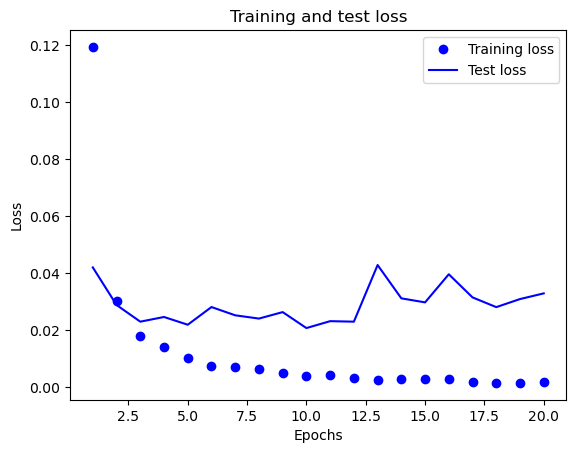

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

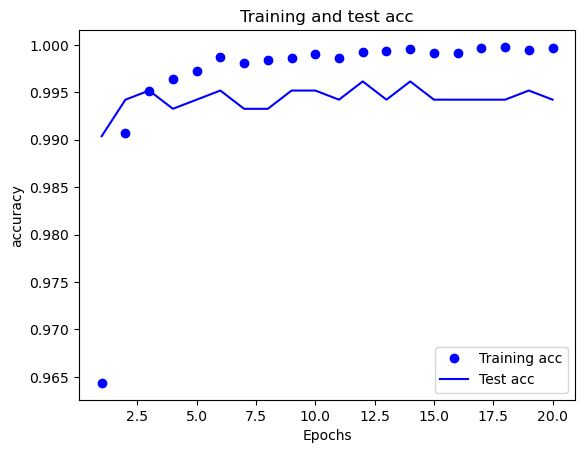

In [27]:
acc = history.history['accuracy']
acc_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc_loss, 'b', label='Test acc')
plt.title('Training and test acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
#Printing Confusion Matrix
dnaclas=["genomic","mitochondrial","chloroplast"]
cm = pd.DataFrame(confusion_matrix(y_test_dna, np.argmax(modelnn.predict(X_test_dna),axis=1)),
                  index = dnaclas,
                  columns = dnaclas)
print('Confusion Matrix:')
print(cm)
print('\n')
print("Reporte de clasificación")
print(classification_report(y_test_dna, np.argmax(modelnn.predict(X_test_dna),axis=1),target_names=dnaclas,digits=4))

82/82 [==============================] - 0s 835us/step
Confusion Matrix:
               genomic  mitochondrial  chloroplast
genomic           1850              3            0
mitochondrial        1            579            0
chloroplast          2              0          161


Reporte de clasificación
82/82 [==============================] - 0s 1ms/step
               precision    recall  f1-score   support

      genomic     0.9984    0.9984    0.9984      1853
mitochondrial     0.9948    0.9983    0.9966       580
  chloroplast     1.0000    0.9877    0.9938       163

     accuracy                         0.9977      2596
    macro avg     0.9977    0.9948    0.9963      2596
 weighted avg     0.9977    0.9977    0.9977      2596



In [29]:
modelnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 97)                6402      
                                                                 
 dense_1 (Dense)             (None, 97)                9506      
                                                                 
 dense_2 (Dense)             (None, 3)                 294       
                                                                 
Total params: 16,202
Trainable params: 16,202
Non-trainable params: 0
_________________________________________________________________


Parametros totales se calcula:
Relaciones x neuronas + bias (nro de relaciones) = 65 x 97 + 97